In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [3]:
X.shape

(569, 30)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, train_size=0.8)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

In [6]:
from sklearn.pipeline import make_pipeline

In [7]:
pipe = make_pipeline(Normalizer(), LogisticRegression(solver='lbfgs'))

In [8]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('normalizer', Normalizer()),
                ('logisticregression', LogisticRegression())])

In [9]:
y_pred = pipe.predict(X_test)

In [10]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [11]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
confusion_matrix(y_test, y_pred)

array([[16, 25],
       [ 0, 73]], dtype=int64)

In [14]:
sum((y_test==0) & (y_pred==0))

16

In [15]:
sum((y_test==0) & (y_pred==1))

25

In [16]:
sum(y_pred==y_test)/len(y_pred)

0.7807017543859649

In [17]:
(73+16)/(16+73+25)

0.7807017543859649

In [18]:
pipe.score(X_test, y_test)

0.7807017543859649

In [19]:
pipe.named_steps['logisticregression']

LogisticRegression()

In [20]:
y_probs = pipe.predict_proba(X_test)

## ROC Curve

In [21]:
# False positive rate vs true positive rate

In [22]:
y_probs

array([[0.33254923, 0.66745077],
       [0.28678547, 0.71321453],
       [0.41809667, 0.58190333],
       [0.29904554, 0.70095446],
       [0.52816867, 0.47183133],
       [0.36767288, 0.63232712],
       [0.31875185, 0.68124815],
       [0.36014848, 0.63985152],
       [0.39724902, 0.60275098],
       [0.34576082, 0.65423918],
       [0.27352837, 0.72647163],
       [0.51311308, 0.48688692],
       [0.45820011, 0.54179989],
       [0.29472022, 0.70527978],
       [0.33480502, 0.66519498],
       [0.41070942, 0.58929058],
       [0.30558996, 0.69441004],
       [0.291554  , 0.708446  ],
       [0.29217994, 0.70782006],
       [0.36280783, 0.63719217],
       [0.49156393, 0.50843607],
       [0.59542045, 0.40457955],
       [0.35289027, 0.64710973],
       [0.26746275, 0.73253725],
       [0.36343089, 0.63656911],
       [0.4728594 , 0.5271406 ],
       [0.48642875, 0.51357125],
       [0.27481006, 0.72518994],
       [0.51727101, 0.48272899],
       [0.28008646, 0.71991354],
       [0.

In [23]:
y_probs_pos = y_probs[:,1] 

In [24]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_pos)

Text(0, 0.5, 'True positive rate')

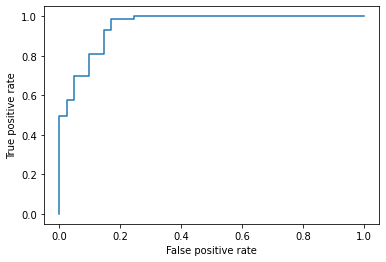

In [25]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')